In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns = columns)
irisDF['target']=iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


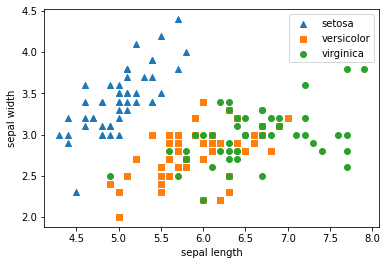

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [6]:
#PCA 수행

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

print(iris_pca.shape)

(150, 2)


In [7]:
pca_columns = ['pca_component_1','pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


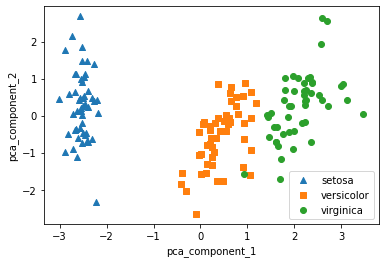

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [9]:
# 각 PCA Coponent 별 변동성 비율

print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rcf = RandomForestClassifier(random_state = 156)
#원본 데이터

scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
0.9533333333333334


In [12]:
# PCA 차원축소 데이터

pca_x = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_x, iris.target, scoring='accuracy')
print(scores_pca)
print(np.mean(scores_pca))

[0.96666667 1.         1.         1.         1.        ]
0.9933333333333334
